<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2020/2</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Entrega: 07 de abril de 2021, 09:55h

In [1]:
@time using Clp
@time using JuMP
@time using PyPlot

 34.173511 seconds (16.05 M allocations: 814.200 MiB, 1.03% gc time)
 17.097026 seconds (15.84 M allocations: 876.138 MiB, 2.78% gc time)
 48.238418 seconds (12.06 M allocations: 607.848 MiB, 0.97% gc time)


In [1]:
versioninfo()

Julia Version 1.5.4
Commit 69fcb5745b (2021-03-11 19:13 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


## Problema 1: (Forma padrão de um programa linear) 

Considere o problema de otimização abaixo:

$$
\begin{array}{rlr}
\max & 4x_1 - 2x_2 + x_3 &\\
& -x_1 + 3x_2 - x_3 & \geq -1 \\
& 5x_2 + 3x_3 & = 5\\
& x_1 + x_2 + x_3 & \leq 1 \\
& x_2 & \geq -1 \\
& x_3 & \geq -2 \\
& x_3 & \leq 2
\end{array}
$$

 - Resolva o programa linear (PL), utilizando JuMP/Julia.
 - Transforme o PL abaixo à forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as duas soluções obtidas.

### Solução do problem 1: Insira sua solução na célula abaixo!

* #### Programa Linear (PL)

In [62]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))  # Nome do modelo e otimizador

#x1 = a - b
#x2 = c - 1
@variable(m, a >= 0)
@variable(m, b >= 0)
@variable(m, c >= 0)    
@variable(m, x3 <= 2)

@constraint(m, -x3 <= 2)
@constraint(m, (a-b) - 3(c-1) + x3 <= 1)
@constraint(m, 5(c-1) + 3x3 <= 5)
@constraint(m, -5(c-1) -3x3 <= -5) 
@constraint(m, (a-b) + (c-1) + x3 <= 1)

@objective(m, Max, 4(a-b) - 2(c-1) + x3)           

optimize!(m)

println("X1 ", JuMP.value.(a-b))
println("X2 ", JuMP.value.((c-1)))
println("X3 ", JuMP.value.(x3))
println("O valor maximizado é ", JuMP.objective_value.(m), "\n")

X1 -0.6666666666666665
X2 0.0
X3 1.6666666666666665
O valor maximizado é -0.9999999999999996

Coin0506I Presolve 4 (-1) rows, 4 (0) columns and 12 (-1) elements
Clp0006I 0  Obj -1.3999999 Primal inf 2.499999 (1) Dual inf 4.999998 (2)
Clp0006I 4  Obj -1
Clp0000I Optimal - objective value -1
Coin0511I After Postsolve, objective -1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -1 - 4 iterations time 0.002, Presolve 0.00


* #### Ax <= b, x >= 0

In [61]:
# vetor x = [a;  b;  c; d]

# x1 = a - b
# x2 = c - 1
# x3 = d - 2

A = [0 0 0 1; 1 -1 -3 1; 0 0 5 3; 0 0 -5 -3; 1 -1 1 1]
b = [4; 0; 16; -16; 4]
c = [4; -4; -2; 1]

using JuMP, Clp
using LinearAlgebra

m = Model(with_optimizer(Clp.Optimizer))
@variable(m, x[1:4] >= 0 ) # Todas as variáveis são >= 0
@constraint(m, A*x .<= b )     
@objective(m, Max, dot(c,x)) 

optimize!(m)

println(m)
#println(status)
println()
println("X1 = ", JuMP.value.((x[1]- x[2])))
println("X2 = ", JuMP.value.((x[3] - 1)))
println("X3 = ", JuMP.value.((x[4] - 2)))
println("O valor maximizado é ", (JuMP.objective_value(m)), "\n")

Max 4 x[1] - 4 x[2] - 2 x[3] + x[4]
Subject to
 x[4] <= 4.0
 x[1] - x[2] - 3 x[3] + x[4] <= 0.0
 5 x[3] + 3 x[4] <= 16.0
 -5 x[3] - 3 x[4] <= -16.0
 x[1] - x[2] + x[3] + x[4] <= 4.0
 x[1] >= 0.0
 x[2] >= 0.0
 x[3] >= 0.0
 x[4] >= 0.0


X1 = -0.6666666666666665
X2 = 0.0
X3 = 1.6666666666666665
O valor maximizado é -0.9999999999999996

Coin0506I Presolve 4 (-1) rows, 4 (0) columns and 12 (-1) elements
Clp0006I 0  Obj -1.3999999 Primal inf 2.4999991 (1) Dual inf 4.999998 (2)
Clp0006I 4  Obj -1
Clp0000I Optimal - objective value -1
Coin0511I After Postsolve, objective -1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -1 - 4 iterations time 0.002, Presolve 0.00


## Problema 2: (Solução gráfica de um PL)

Desenhe a região viável do seguinte PL e encontre o valor mínimo graficamente.
$$
\begin{array}{rcl}
\max & 2x + 3y &   \\
\mbox{s.a.} & -3x + y & \leq 2 \\
& 4x + 2y & \leq 44 \\
& 4x - y & \leq 20 \\
&- x+ 2y & \leq 14 \\
& 0      & \leq x, y
\end{array}
$$
Agora resolva o mesmo problema no JuMP e compare as soluções.

### Solução do problema 2: Insira sua solução na célula abaixo!

* #### Desenhando Região Viável - (em vermelho)

<br><br>

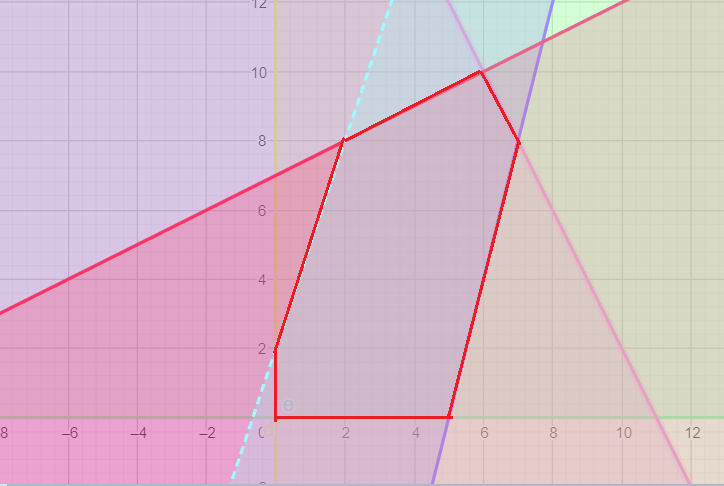

<br><br>

A partir da imagem podemos dizer que o valor mínimo é (0,0).

* #### Solução usando JuMP

In [5]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))  #Nome do modelo e otimizador (algoritmo)

@variable(m, x >= 0)
@variable(m, y >= 0)             
@constraint(m, -3x + y <= 2)
@constraint(m, 4x + 2y <= 44)        
@constraint(m, 4x - y <= 20)
@constraint(m, -x + 2y <= 14)
@objective(m, Max, -(2x + 3y))           

optimize!(m)

println("X = ", JuMP.value.(x))
println("Y = ", JuMP.value.(y))
println("O valor é ", JuMP.objective_value.(m), "\n")

X = 0.0
Y = 0.0
O valor da Maximização é 0.0

Coin0506I Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
Clp0000I Optimal - objective value 0
Clp0032I Optimal objective 0 - 0 iterations time 0.002


## Problema 3: (Poliedro convexo como conjunto viável $\{x: Ax \leq b\}$ )

![geogebra-export.png](attachment:geogebra-export.png)
Foi visto em sala de aula que, para qualquer matriz $A \in R^{m \times n}$, $b \in R^m, x \in R^n$, o conjunto $\{x : Ax \leq b\}$ é um poliedro convexo. Este exercício pede para investigar o caminho inverso.
O tetraedro da figura acima possui vértices $A = (0,0,0)$, $B= (4,0,0)$, $C=(2,3.46,0)$ e $D= (2,1.15,3.27)$. Você consegue representá-lo na forma de um conjunto $\{x : Ax \leq b\}$? Caso afirmativo, mostre os cálculos levando à matriz $A$ e ao vetor $b$.

- Sugestão: Como o ponto $A$ está na origem, denotamos por $b,c,d$ os vetores $AB,AC,AD$. Três das quatro faces do tetraedro são combinações convexas de pares distintos dos vetores $b,c,d$, i.e., dos pares $\{b,c\}$, $\{b,d\}$ e $\{c,d\}$. A quarta face $BCD$ requer um pouco mais de trabalho...

### Solução do problema 3: Insira sua solução na célula abaixo!

Depois de parametrizar, achar a normal do plano e utilizando a equação geral do plano, descobrimos os 4 planos que passam nas 4 faces do poliedro, estes são:

<br>

$$
\begin{array}{rcl}
ACD= & 11.34x -6.54y -4.62z = 0 &  \\
ABC= & z = 0&  \\
ABD= & -24y +8,6z = 0 &  \\
BCD= & 11.34x +6.54y +4.62z = 45.2568&  \\
\end{array}
$$

<br>

A partir dessas restrições, temos o seguinte A,x e b:

<br>

```
vetor x = [x; y; z]

A = [11.34 -6.54 -4.62; 0 0 1; 0 -24 8.6; 0 0 -5 -3; 11.34 6.54 4.62]
b = [0; 0; 0; 45.2568]
```


## Problema 4: (Solução gráfica de PL parametrizado)

Encontre graficamente todos os valores do parâmetro $a$ tais que $(-3,4)$ seja a solução ótima do seguinte PL:
\begin{array}{rl}
    \text{maximize} & ax_1 + (2-a)x_2  \\
    \text{sujeito a}& 4x_1 + 3x_2 \leq 0 \\
              & 2x_1 + 3x_2       \leq 7 \\
              & x_1  + x_2        \leq 1
\end{array}
Verifique sua solução com código em JuMP.

### Solução do problema 4: Insira sua solução na célula abaixo!

<br>

* #### Solução Gráfica

<br>

O ponto $(-3,4)$ fica na interseção das retas:

$$
\begin{array}{rcl}
& 4x_1 + 3x_2 \leq 0 &  \\
& x_1  + x_2 \leq 1&  \\
\end{array}
$$

<br>

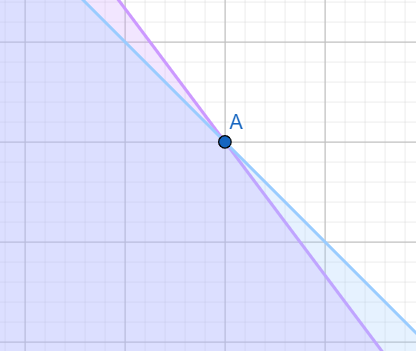

Logo sabemos que angulação da reta objetivo tem que estar entre as duas retas. Para comparar a angulação, vamos calcular o $cos$ das retas:

Obs: 

$$
\begin{array}{rcl}
 \text{reta 1:}& 4x_1 + 3x_2 \leq 0 &  \\
 \text{reta 2:} & x_1  + x_2 \leq 1&  \\
 \text{reta 3:} & ax + (2-a)y  \\
\end{array}
$$
<br><br>
$$
\begin{array}{rcl}
& cos(\theta_2) \leq cos(\theta_3) \leq cos(\theta_1)&  \\
& 0.707 \leq \frac{a}{\sqrt{2a^2 - 4a + 4}} \leq 0.8\\
\end{array}
$$

<br>

Logo:

$$
\begin{array}{rcl}
& 1 \leq a \leq 7.908&  \\
\end{array}
$$

<br>

Ao maximizar, temos que $a = 1$.

* #### Solução em JuMP

In [59]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, x1)
@variable(m, x2)

@constraint(m, 3x1 + 4x2 <= 0)
@constraint(m, 2x1 + 3x2 <= 7)
@constraint(m, x1 + x2 <= 1)

@objective(m, Max, x1 + x2)           

optimize!(m)

println("X1 = ", JuMP.value.(x1))
println("X2 = ", JuMP.value.(x2))
println("O valor de maximização é ", JuMP.objective_value.(m), "\n")

X1 = 3.999999999996
X2 = -2.999999999996
O valor de maximização é 1.0

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 0.0199998 (2) w.o. free dual inf (0)
Clp0006I 0  Obj 0 Dual inf 0.0199998 (2) w.o. free dual inf (0)
Clp0006I 2  Obj 1
Clp0000I Optimal - objective value 1
Clp0032I Optimal objective 1 - 2 iterations time 0.062


## Problema 5 (Gerenciamento de processo): 

O produto de uma usina química é uma composição de dois produtos químicos, 1 and 2, na proporção 5:2 por peso. Estes produtos químicos, por sua vez, podem ser produzidos por três processos diferentes, utilizando duas matérias primas e combustível. Dados referentes à produção estão na tabela mostrada na célula abaixo. Por quanto tempo cada processo deve ser utilizado para maximizar a produção total (da composição) da usina?

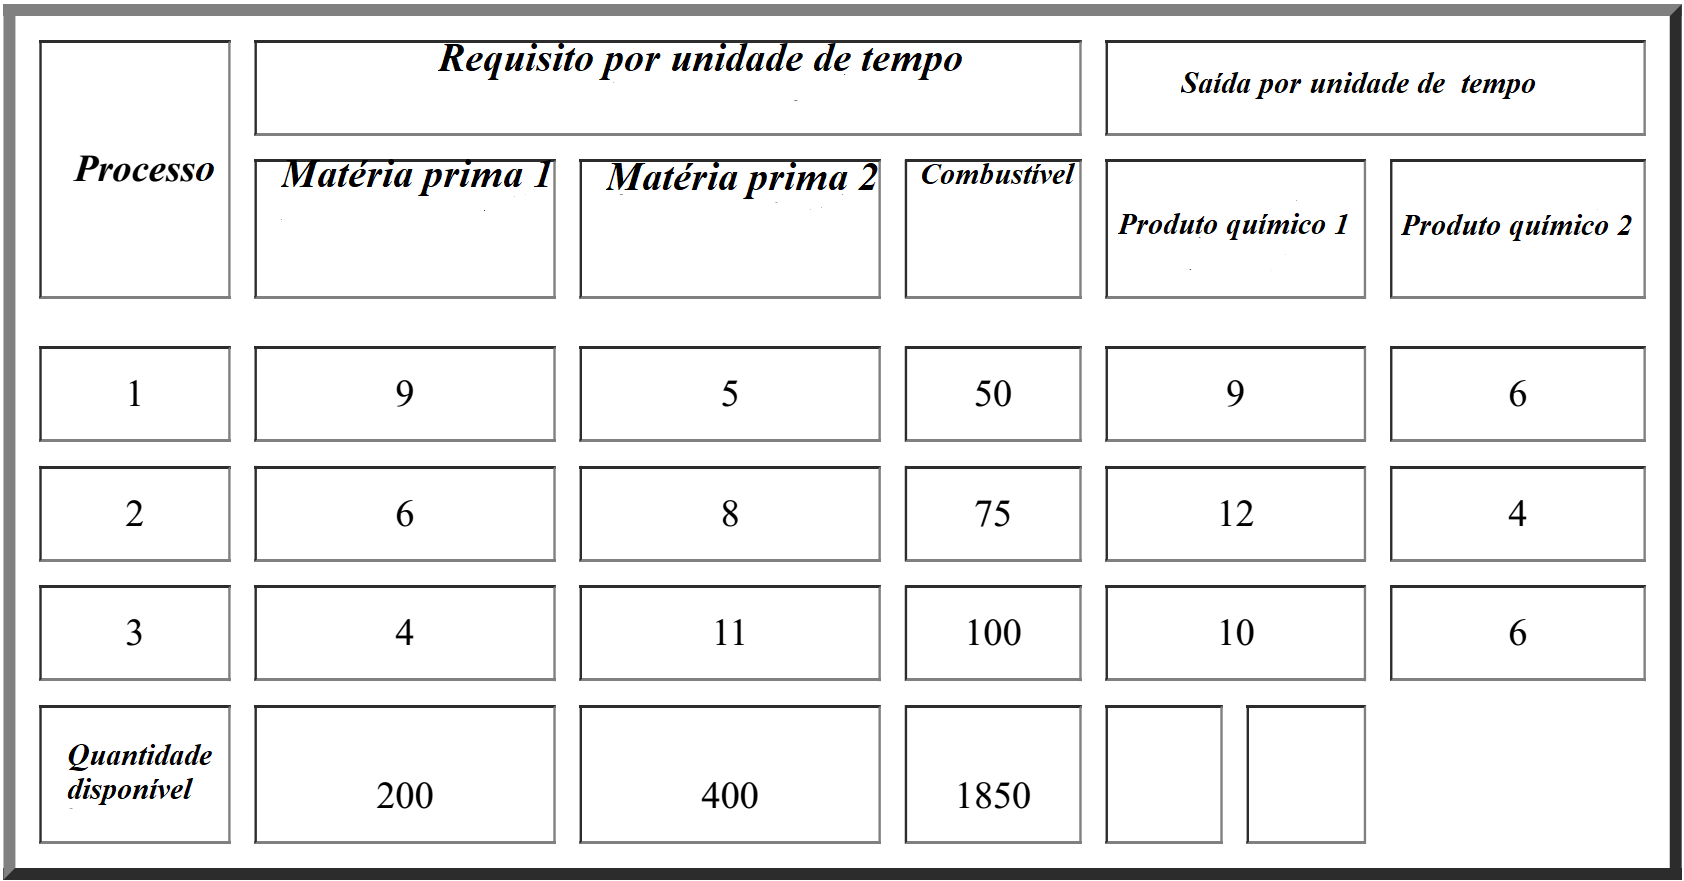

In [ ]:
display("image/png", read("blending.png"))

### Solução do problem 5: Insira sua solução na célula abaixo!

In [58]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, 0 <= p1) #Processo 1
@variable(m, 0 <= p2) # Processo 2
@variable(m, 0 <= p3) # Processo 3

@constraint(m, 9p1 + 6p2 + 4p3 <= 200) # Matéria Prima 1
@constraint(m, 5p1 + 8p2 + 11p2 <= 400) # Matéria Prima 2
@constraint(m, 50p1 + 75p2 + 100p3 <= 1850) # Combustível

@expression(m, pq1,  9p1 + 12p2 + 10p3) # Produto Químico 1
@expression(m, pq2, 6p1 + 4p2 + 6p3) # Produto Químico 2

@constraint(m, 2pq1 == 5pq2) # Produção em proporção

@objective(m, Max, 5pq1 + 2pq2)           

optimize!(m)

println("Processo 1: ", JuMP.value.(p1))
println("Processo 2: ", JuMP.value.(p2))
println("Processo 3: ", JuMP.value.(p3))
println("Produção da Composição: ", JuMP.value.(pq2/2), "\n")

Processo 1: 5.695538057742782
Processo 2: 19.553805774278217
Processo 3: 0.9868766404199478
Produção da Composição: 59.15485564304463

Coin0506I Presolve 3 (-1) rows, 2 (-1) columns and 6 (-5) elements
Clp0006I 0  Obj -0 Dual inf 493 (2)
Clp0006I 2  Obj 1715.4908
Clp0000I Optimal - objective value 1715.4908
Coin0511I After Postsolve, objective 1715.4908, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1715.490814 - 2 iterations time 0.002, Presolve 0.00


## Problema 6 (Produção de vinho)
Um produtor de vinho produz dois tipos de vinho, suave (V) e seco (S),  obtendo 5 reais de lucro por litro de vinho suave e 4 reais por litro de vinho seco. Vinho suave requer 3 caixas de uvas, 4 kg de açúcar e 2 unidades de extrato por litro. Vinho seco requer 4 caixas de uvas, 3 kg de açúcar e 1 unidade de extrato por litro. Ele possui 14 caixas de uvas, 8 kg de açúcar e 6 unidades de extrato e quer utilizar estes insumos para maximizar seu lucro. 
1. Formule o problema e ajude o produtor a determinar o esquema de produção ótimo. 
2. Mantendo este esquema ótimo:
    - determine a variação de preço por litro de vinho seco que ele pode admitir sem ter prejuízo. 
    - determine o número mínimo de caixas de uva ele necessita para continuar lucrando.
3. Supondo que, no problema original, o vinho suave passa a requerer $7\frac{1}{2}$ unidades de extrato. Analise a sensibilidade da solução ótima diante desta mudança.

### Solução do problem 6: Insira sua solução na célula abaixo!

1. Formule o problema e ajude o produtor a determinar o esquema de produção ótimo.

In [57]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, 0 <= v) #Vinho Suave
@variable(m, 0 <= s) # Vinho Seco

@constraint(m, 3v + 4s <= 14) # Caixas de Uva
@constraint(m, 4v + 3s <= 8) # Quilos de Açúcar
@constraint(m, 2v + 1s <= 6) # Extrato 

@objective(m, Max, 5v + 4s) # Maximização de Lucro          

optimize!(m)

println("Litros de Vinho Suave: ", JuMP.value.(v))
println("Litros de Vinho Seco: ", JuMP.value.(s))
println("Lucro: ", JuMP.objective_value.(m), "\n")

Litros de Vinho Suave: 0.0
Litros de Vinho Seco: 2.6666666666666665
Lucro: 10.666666666666666

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 8.9999998 (2)
Clp0006I 1  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 1 iterations time 0.002


2. Mantendo este esquema ótimo:
    - determine a variação de preço por litro de vinho seco que ele pode admitir sem ter prejuízo. 
 
 <br>
Variação: Entre 0 e 4 reais.

In [55]:
# Como o modelo diz para não produzir vinho suave, este não será contablilizado

using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m,0 <= pv <= 4) # Preço Vinho Seco

@constraint(m, pv*2.6666666666666665 >= 0) #Lucro

@objective(m, Min, pv) # Minimização do preço do Vinho Seco         

optimize!(m)

println("Lucro ", JuMP.value.(pv*2.6666666666666665))
println("Preço Mínimo do Vinho Seco: ", JuMP.objective_value.(m), "\n")

Lucro 0.0
Preço Mínimo do Vinho Seco: 0.0

Coin0506I Presolve 0 (-1) rows, 0 (-1) columns and 0 (-1) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00


 - determine o número mínimo de caixas de uva ele necessita para continuar lucrando.

In [54]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, v >= 0) #Vinho Suave
@variable(m, s >= 0) # Vinho Seco

@constraint(m, 5v + 4s >= 4) # Lucro tem que ser no mínimo o lucro do produto de menor lucro

@objective(m, Min, 3v + 4s) # Minimização das caixas de uva          

optimize!(m)

println("Lucro: ", JuMP.value.(5v + 4s))
println("Caixas: ", JuMP.objective_value.(m), "\n")

Lucro: 4.0
Caixas: 2.4000000000000004

Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 2.4
Coin0511I After Postsolve, objective 2.4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2.4 - 0 iterations time 0.002, Presolve 0.00


3. Supondo que, no problema original, o vinho suave passa a requerer $7\frac{1}{2}$ unidades de extrato. Analise a sensibilidade da solução ótima diante desta mudança.

<br>

Como o modelo já indicava para somente produzir Vinho Seco e a quantidade de extratos para o Vinho Suave já era 1, qualquer mudança da quantidade de extratos para valores não negativos, terá o mesmo resultado, logo o modelo não é sensível a essa mudança.

In [53]:
using JuMP, Clp

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, 0 <= v) # Vinho Suave
@variable(m, 0 <= s) # Vinho Seco

@constraint(m, 3v + 4s <= 14) # Caixas de Uva
@constraint(m, 4v + 3s <= 8) # Quilos de Açúcar
@constraint(m, 7.5v + 1s <= 6) # Extrato 

@objective(m, Max, 5v + 4s) # Maximização de Lucro          

optimize!(m)

println("Litros de Vinho Suave: ", JuMP.value.(v))
println("Litros de Vinho Seco: ", JuMP.value.(s))
println("Lucro: ", JuMP.objective_value.(m), "\n")

Litros de Vinho Suave: 0.0
Litros de Vinho Seco: 2.666666666666666
Lucro: 10.666666666666664

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 5.2898433 (2)
Clp0006I 2  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 2 iterations time 0.002


## Problema 7 (Escalação de entrevistas)

A empresa startup Doodle quer agendar entrevistas para um candidato para a posição de engenheiro de software.

O dia de trabalho disponível, entre 10 e 15h, está dividido em  intervalos de 20 minutos que podem ser utilizados para entrevistas individuais.

Também há um intervalo de uma hora no meio do dia quando 3 pesquisadores levam o candidato para o almoço.

Idealmente todos os 15 pesquisadores da empresa deveriam ter um encontro (almoço ou entrevista) com o candidato durante o dia, mas como todos tem agendas cheias, não está claro que isto seria possível.

Como primeiro passo, foi feita uma enquete com os 15 pesquisadores para saber da disponibilidade de cada um.

O resultado está mostrado na tabela abaixo, na qual um elemento um (1) em uma célula indica disponibilidade no horário associado à célula, e um zero (0) indica indisponibilidade.

Determinar se  existe um agendamento viável e,  caso afirmativo, gerar uma agenda para o candidato, indicando qual pesquisador encontraria em qual intervalo.

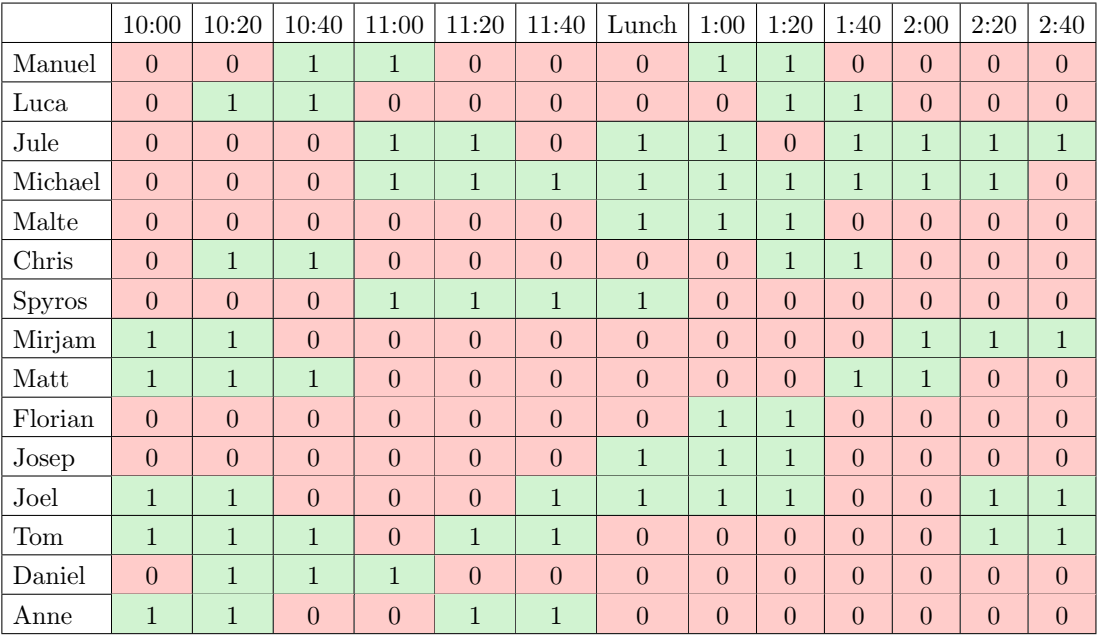

In [ ]:
display("image/png", read("doodle.png"))
#![image.png](attachment:image.png)

### Solução do problem 7: Insira sua solução na célula abaixo!

In [3]:
using JuMP, Clp, NamedArrays

# Lunch: 12.0 + 12.2 + 12.4

horarios = [10.0, 10.2, 10.4,11.0,11.2,11.4,12.0,12.2,12.4,13.0,13.2,13.4,14.0,14.2,14.4]

nomes = [:Manuel, :Luca, :Jule, :Michel, :Malte, :Chris, :Spyros, :Mirjam, :Matt, :Florian, 
        :Josep, :Joel, :Tom, :Daniel, :Anne] #pesquisadores

disp = [0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
        0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 
        0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 
        0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
        0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
        0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 
        0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
        1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 
        1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 
        0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
        0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 
        1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 
        1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
        0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
        1 1 0 0 1 1 0 0 0 0 0 0 0 0 0]

times = NamedArray( disp, (nomes,horarios), ("nomes","horarios"))

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, x[nomes, horarios] >= 0)

# um pesquisador encontra o candidato uma vez 
@constraint(m, pesquisador[i in nomes], sum(x[i,j] for j in horarios) == 1 ) 

# cada evento só tem um pesquisador presente
@constraint(m, encontro[j in horarios], sum(x[i,j] for i in nomes) == 1 )

# Ter certeza que são 15 encontros, se não for possível, dará erro 
@constraint(m, sum( x[i,j]*times[i,j] for i in nomes, j in horarios ) == 15)

@objective(m, Max, sum( x[i,j]*times[i,j] for i in nomes, j in horarios ))

optimize!(m)
x_opt = JuMP.value.(x)
assignment = NamedArray( [ (x_opt[i,j]) for i in nomes, j in horarios], (nomes, horarios), ("nomes","horarios"))

show(IOContext(stdout, :limit => false), assignment)

print("\n\n")

15×15 Named Array{Float64,2}
nomes ╲ horarios │ 10.0  10.2  10.4  11.0  11.2  11.4  12.0  12.2  12.4  13.0  13.2  13.4  14.0  14.2  14.4
─────────────────┼─────────────────────────────────────────────────────────────────────────────────────────
:Manuel          │  0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
:Luca            │  0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
:Jule            │  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
:Michel          │  0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
:Malte           │  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
:Chris           │  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0
:Spyros          │  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do problem 8: Insira célula com a sua solução!

1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.

In [52]:
using JuMP, Clp, LinearAlgebra

#OBS: tive que fazer assim pq Julia não converte model para int ou float
valor_anterior = 242400.0 #foi calculado em Python
valor_atual = 143400.0 #resultado da Modelagem

demanda = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50] # demanda do dia
cost = [100 400 0 ] #custo se <50, >50, =50 e armazenamento na bateria

m = Model(with_optimizer(Clp.Optimizer))
 
@variable(m, 0 <= l[1:24] <= 50)  # hora abaixo de 50
@variable(m, 0 <= h[1:24] <= 15)  # hora acima de 50
@variable(m, 0 <= b[1:25] <= 30)  # bateria

@constraint(m, b[1] == 0)         # bateria começa o dia descarregada
@constraint(m, flow[i in 1:24], l[i] + h[i] + b[i] == demanda[i] + b[i+1]) # conservation of boats
total = [sum(l) sum(h) sum(b)]
@objective(m, Min, dot(cost,total))   # minimizar custos

optimize!(m)

economia = valor_anterior - valor_atual

println("Compre ", Array{Int}(JuMP.value.(h' + l')), " MWh")
println("Bateria contém ", Array{Int}(JuMP.value.(b')), " MWh.")
println("Foram gastos ", JuMP.objective_value.(m), " reais.")
println("Foram economizados ", economia, " reais.\n" )

Compre [50 33 36 36 35 38 44 50 50 50 50 50 50 50 50 50 50 61 65 65 65 65 57 50] MWh
Bateria contém [0 7 0 0 0 0 0 3 7 8 10 13 16 18 22 27 30 30 28 18 8 1 0 0 0] MWh.
Foram gastos 143400.0 reais.
Foram economizados 99000.0 reais.

Coin0506I Presolve 21 (-4) rows, 62 (-11) columns and 82 (-15) elements
Clp0006I 0  Obj 69329.993 Primal inf 727.80002 (21)
Clp0006I 31  Obj 143400 Primal inf 33.500013 (4)
Clp0006I 44  Obj 143400
Clp0000I Optimal - objective value 143400
Coin0511I After Postsolve, objective 143400, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 143400 - 44 iterations time 0.002, Presolve 0.00


2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?

In [51]:
using JuMP, Clp, LinearAlgebra

#OBS: tive que fazer assim pq Julia não converte model para int ou float
valor_anterior = 242400.0 #foi calculado em Python
valor_atual = 120000.0 #resultado da Modelagem

demanda = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50] # demanda do dia
cost = [100 400 0 ] #custo se <50, >50, =50 e armazenamento na bateria

m = Model(with_optimizer(Clp.Optimizer))
 
@variable(m, 0 <= l[1:24] <= 50)  # hora abaixo de 50
@variable(m, 0 <= h[1:24] <= 15)  # hora acima de 50
@variable(m, b[1:25] >= 0)        # bateria

@constraint(m, b[1] == 0)         # bateria começa o dia descarregada
@constraint(m, flow[i in 1:24], l[i] + h[i] + b[i] == demanda[i] + b[i+1])# conservation of boats
total = [sum(l) sum(h) sum(b)]
@objective(m, Min, dot(cost,total))# minimizar custos

optimize!(m)

economia = valor_anterior - valor_atual

println("Compre ", Array{Int}(JuMP.value.(h' + l')), " MWh")
println("Bateria contém ", Array{Int}(JuMP.value.(b')), " MWh.")
println("Foram gastos ", JuMP.objective_value.(m), " reais.")
println("Foram economizados ", economia, " reais.\n" )

Compre [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] MWh
Bateria contém [0 7 17 31 45 60 72 81 85 86 88 91 94 96 100 105 108 108 95 70 45 23 7 0 0] MWh.
Foram gastos 120000.0 reais.
Foram economizados 122400.0 reais.

Coin0506I Presolve 18 (-7) rows, 53 (-20) columns and 70 (-27) elements
Clp0006I 0  Obj 4369.9955 Primal inf 1156.3 (18)
Clp0006I 31  Obj 120000 Primal inf 203.89998 (9)
Clp0006I 42  Obj 120000
Clp0000I Optimal - objective value 120000
Coin0511I After Postsolve, objective 120000, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 120000 - 42 iterations time 0.072, Presolve 0.02


3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).
     

<br>

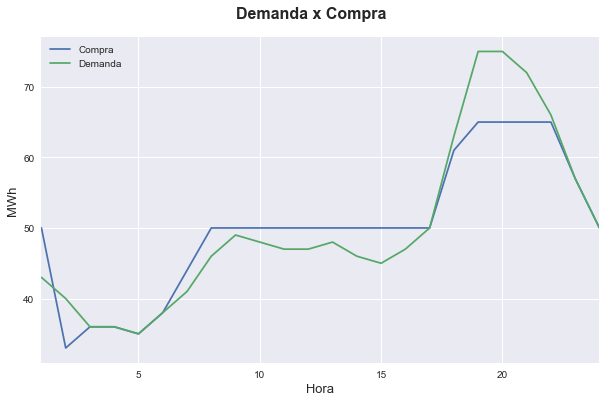

## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do problem 9: Insira sua solução na célula abaixo!

1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 

In [45]:
####################################   DADOS DO PROJETO   ###############################################
tarefas = []
for i = 1:18
    push!(tarefas, i) #converte i em string
end

duration = [2,16,9,8,10,6,2,2,9,5,3,2,1,7,4,3,9,1] #duração das tarefas
duration = Dict(zip(tarefas,duration))

# Tarefas predecessoras de cada atividade
pred = ([],[1],[2], [2],[3],[4,5],[4],[6],[4,6],[4],[6],[9],[7],[2],[4,14],[8,11,14],
    [12],[17])
pred = Dict(zip(tarefas,pred));

In [50]:
##################################     CÓDIGO DO MODELO    ##########################################

using JuMP,Clp
m = Model(with_optimizer(Clp.Optimizer))

@variable(m, tstart[tarefas])

for i in tarefas
    for j in pred[i]
        @constraint(m, tstart[i] >= tstart[j] + duration[j])
    end
end
@constraint(m, tstart[1] == 0)

#Tempo Total = tempo de início da última tarefa + tempo de execução da última tarefa
@objective(m, Min, tstart[18] + duration[18]) 

optimize!(m)
#println(JuMP.value.(tstart))
println("Duração mínima de ", JuMP.objective_value(m), " semanas.\n")

Duração mínima de 64.0 semanas.

Coin0506I Presolve 0 (-23) rows, 0 (-18) columns and 0 (-45) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 64
Coin0511I After Postsolve, objective 64, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 64 - 0 iterations time 0.002, Presolve 0.00


2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.

<br>

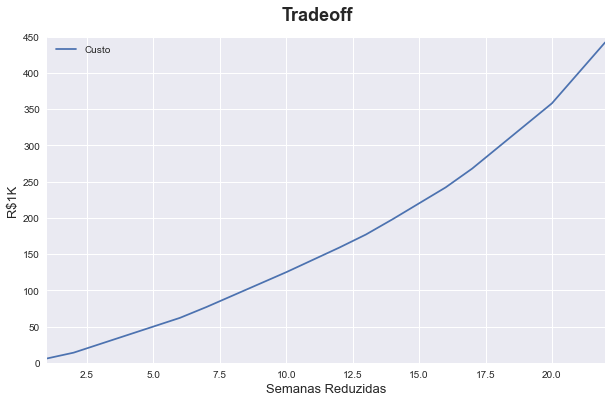

In [97]:
using JuMP, Clp, LinearAlgebra

max_red = [0,3,1,2,2,1,1,0,2,1,1,0,0,2,2,1,3,0] # redução máxima
cost = [0,30,26,12,17,15,8,0,42,21,18,0,0,22,12,6,16,0] #custo da redução

for red in red
    
    m = Model(with_optimizer(Clp.Optimizer))
    
    @variable(m,reduced_weeks[1:18] >= 0) #quantas semanas são reduzidas
    
    # redução é restringida pelo máximo de restrição de cada tarefa
    @constraint(m, [i in 1:18], reduced_weeks[i] <= max_red[i])
    
    # semanas reduzidas tem que ser igual à redução que eu estipulei
    @constraint(m, sum(reduced_weeks) == red)

    @objective(m, Min, dot(cost,reduced_weeks))#minimizar custos

    optimize!(m);
    println("Custo R\$ ", JuMP.objective_value.(m), " K");
    println("Semanas Reduzidas ", red, "\n" );
end

Custo R$ 6.0 K
Semanas Reduzidas 1

Custo R$ 14.0 K
Semanas Reduzidas 2

Custo R$ 26.0 K
Semanas Reduzidas 3

Custo R$ 38.0 K
Semanas Reduzidas 4

Custo R$ 50.0 K
Semanas Reduzidas 5

Custo R$ 62.0 K
Semanas Reduzidas 6

Custo R$ 77.0 K
Semanas Reduzidas 7

Custo R$ 93.0 K
Semanas Reduzidas 8

Custo R$ 109.0 K
Semanas Reduzidas 9

Custo R$ 125.0 K
Semanas Reduzidas 10

Custo R$ 142.0 K
Semanas Reduzidas 11

Custo R$ 159.0 K
Semanas Reduzidas 12

Coin0506I Presolve 0 (-19) rows, 0 (-18) columns and 0 (-36) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 6
Coin0511I After Postsolve, objective 6, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 6 - 0 iterations time 0.002, Presolve 0.00
Coin0506I Presolve 1 (-18) rows, 7 (-11) columns and 7 (-29) elements
Clp0006I 0  Obj 0 Primal inf 1.999999 (1)
Clp0006I 1  Obj 14
Clp0000I Optimal - objective value 14
Coin0511I After Postsolve, objective 14, infeasibilities - dual

3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

<br>

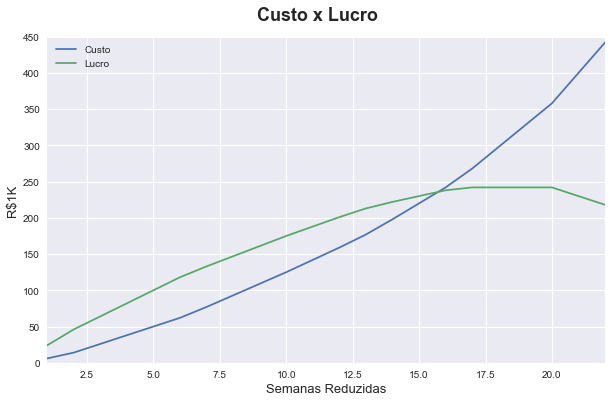

<br>

Temos um pico de 17 a 20 semanas reduzidas, onde o lucro é de 242K, como queremos entregar o estádio o mais rapidamente para a população, o tempo de entrega será de 44 semanas com lucro de 242K.

## Problema 10: (Clássico: dieta ótima)

Suponha que uma certa dieta alimentar esteja baseada nos alimentos (em parêntesis vemos as unidades utilizadas): 
leite desnatado (litro) , carne magra de boi (Kg), carne de frango (kg) e batata doce (100 g). 
Sabendo-se que os requisitos nutricionais serão expressos em termos de vitaminas A,C, e D e controlados por 
suas quantidades mínimas (em miligramas), uma vez que são indispensáveis à preservação da saúde da pessoa 
que estará se submetendo a dieta. A Tabela abaixo resume a quantidade de cada vitamina em disponibilidade 
**em cada unidade considerada dos alimentos**, sua necessidade diária para a boa saúde de uma pessoa e o custo 
(em reais) de cada unidade do alimento considerado. Modele e resolva o problema de forma a minimizar os gastos com a 
compra dos alimentos, obedecendo às quantidades mínimas recomendadas em relação às vitaminas.

Tabela: Dados do problema da dieta

|Alim.$\rightarrow$|leite | carne |frango | batata | Qtd. Mín. |
|------------------|------|-------|-------|--------|-----------|
|Vit.$\downarrow$ |  
|A |2 |2 |5 |4 |11 |
|C |50 | 20 | 10 | 45| 70 |
|D |80 |70 |10 |60 |250|
| |
|Custo $\rightarrow$ |5 |40 |20 |2 |




### Solução do problem 10: Insira sua solução na célula abaixo!

In [31]:
using JuMP, Clp, LinearAlgebra

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, leite >= 0)       
@variable(m, carne >= 0)             
@variable(m, frango >= 0) 
@variable(m, batata >= 0) 

@constraint(m, 2leite + 2carne + 5frango + 4batata >= 11) #Vitamina A
@constraint(m, 50leite + 20carne + 10frango + 45batata >= 70) #Vitamina C
@constraint(m, 80leite + 70carne + 10frango + 60batata >= 250) #Vitamina D

total = 5leite + 40carne + 20frango + 2batata

@objective(m, Min, total)

optimize!(m)

println("Compre ", JuMP.value.(leite'), " litros de Leite")
println("Compre ", JuMP.value.(carne'), " quilos de Carne.")
println("Compre ", JuMP.value.(frango'), " quilos de Frango.")
println("Compre ",  JuMP.value.(batata'), " quilos de Batata Doce.")

println("Gasto em 1 dia de dieta ", JuMP.value.(total), " reais.")

Compre 0.0 litros de Leite
Compre 0.0 quilos de Carne.
Compre 0.0 quilos de Frango.
Compre 4.166666666666666 quilos de Batata Doce.
Gasto em 1 dia de dieta 8.333333333333332 reais.
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 6.7249997 (3)
Clp0006I 1  Obj 8.3333333
Clp0000I Optimal - objective value 8.3333333
Clp0032I Optimal objective 8.333333333 - 1 iterations time 0.002
